In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import scipy.stats
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

sns.set(context='poster')
%matplotlib inline

### Задача 1:

Скачайте датасет про классификацию женщин с диабетом. Разделите на трейн и тест.

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [13]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Обучите обычное решающее дерево глубины 3. Выведите его графическое представление, а также accuracy на тренировочной и тестовой выборке.

In [15]:
model = DecisionTreeClassifier(max_depth= 3)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Посчитайте accuracy

In [18]:
accuracy_score(y_test, model.predict(X_test))

0.7597402597402597

Визуализируйте дерево

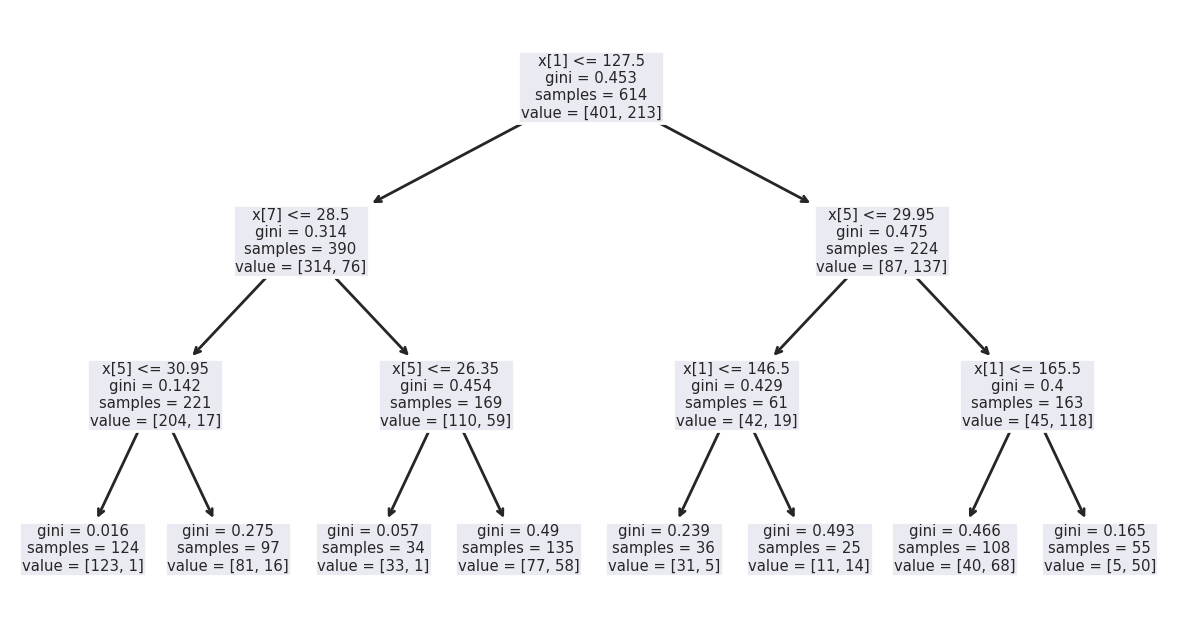

In [22]:
plt.figure(figsize = (15,8))
plot_tree(model);

Теперь обучите случайный лес с 100 деревьями.

In [24]:
n_estimators = 100

model2 = RandomForestClassifier(n_estimators= n_estimators)

In [25]:
model2.fit(X_train,y_train)

RandomForestClassifier()

Выведите параметры леса.

In [32]:
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Какие параметры уже известны и относятся к решающему дереву?

**Ответ:** критерий, макс глубина, фичи, семплы, семплы в листе



Появляются новые важные гиперпараметры: n_estimators (количество деревьев в лесу). Также важным является гиперапараметр max_features &mdash; максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева. Перед каждым разбиением дерева генерируется выборка из `min(k, max_features)` случайных признаков (`k` — количество признаков в датасете) и только эти признаки рассматриваются как разделяющие в данной вершине.

Выведите качество, сравните с деревом.

In [26]:
accuracy_score(y_test, model2.predict(X_test))

0.7532467532467533

**Вывод:** практически така же

плохой датасет

Нарисуйте первые 6 деревьев леса.

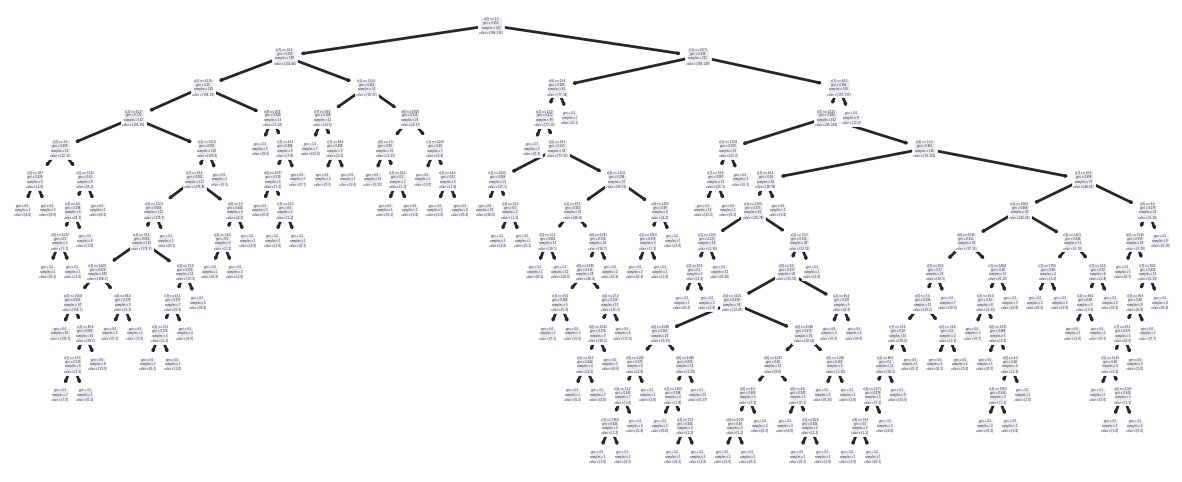

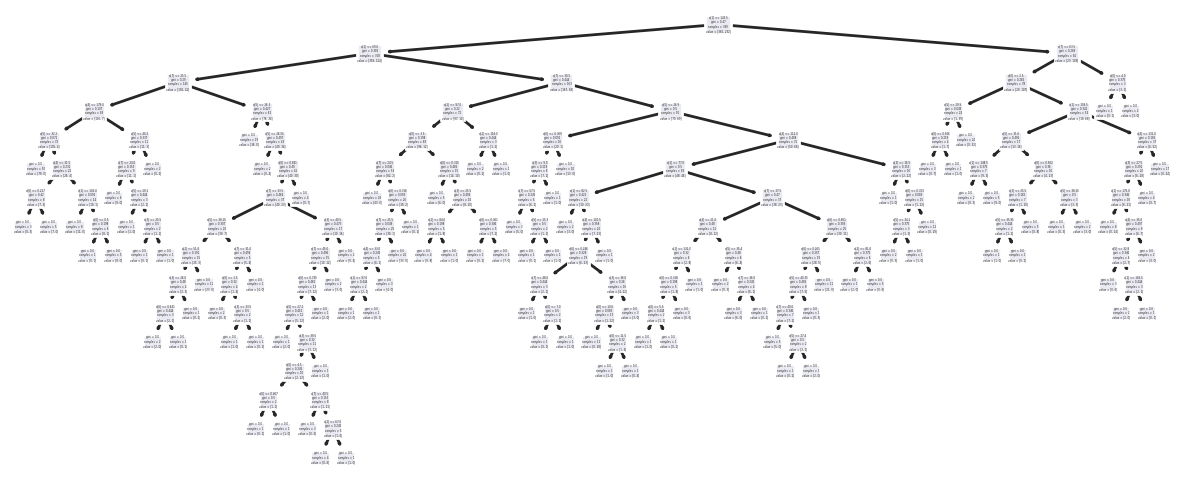

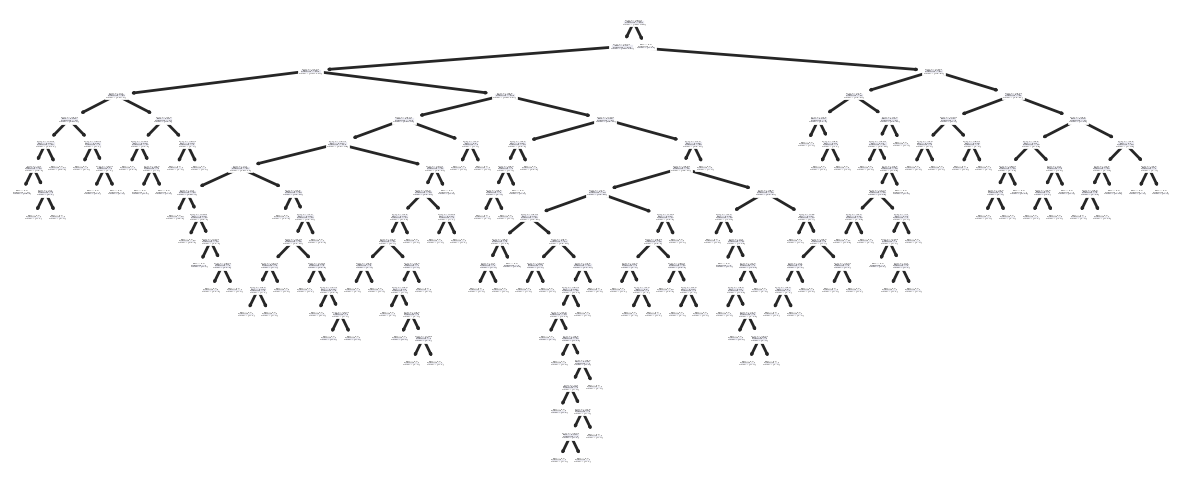

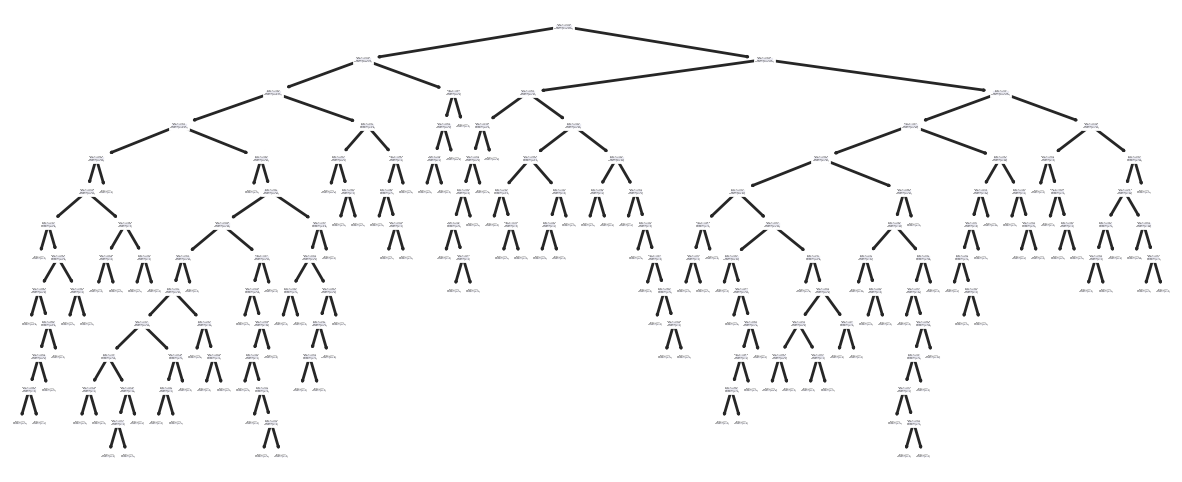

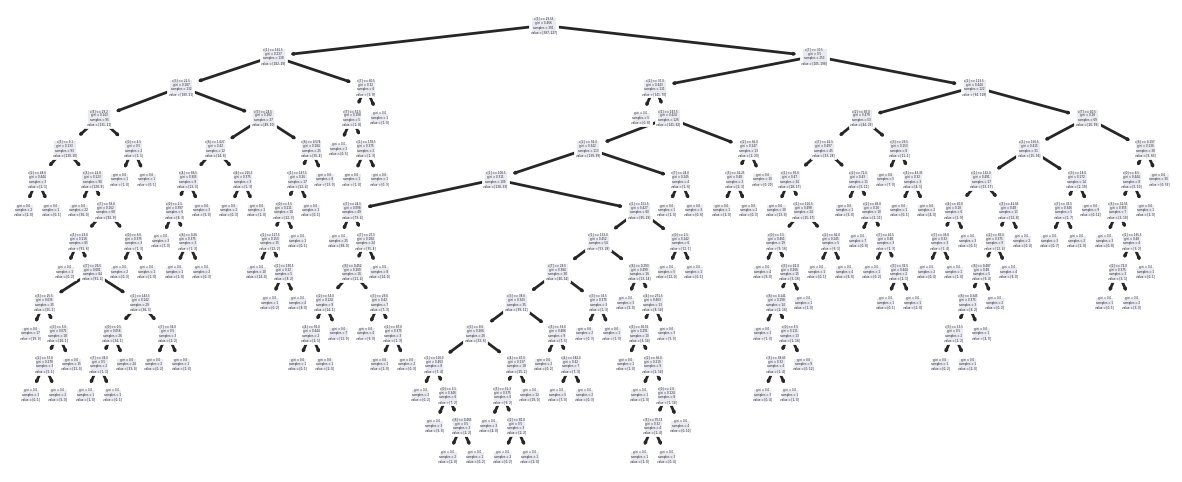

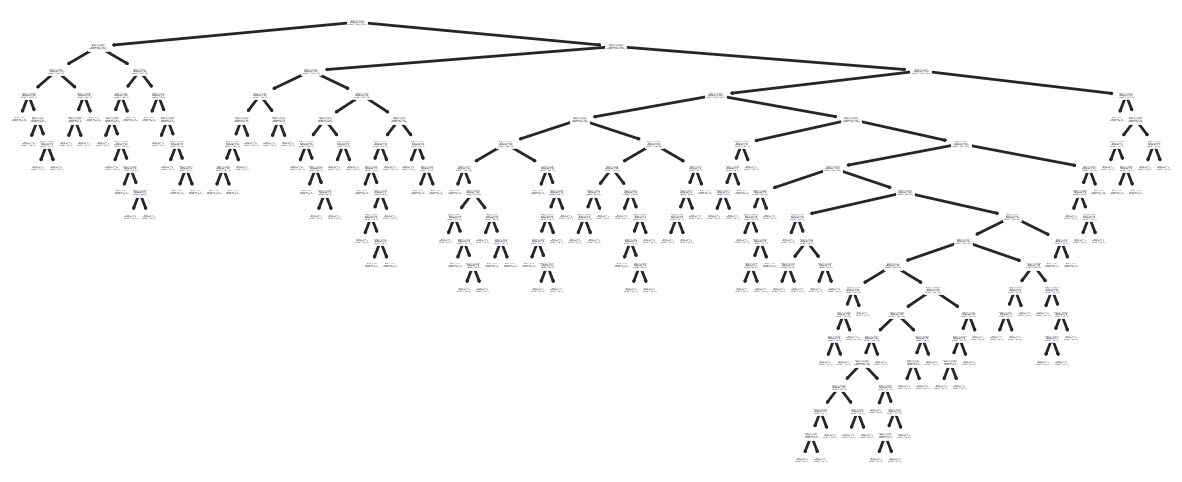

In [34]:
for i in range(6):
  plt.figure(figsize = (15,6))
  plot_tree(model2[i])

Как выглядят деревья в решающем дереве? Насколько они отличаются от обученного ранее дерева и друг от друга?

**Вывод:** Так как мы никак не ограничивали деревья в лесу, они оказались сильно различными между собой(что мы и хотим)

Ну и очевидно они отличаются от обычного дерева глубиной 3